# Data Understanding and Cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("MoloPotato.xlsx")
df.head()

,Market,Commodity,Retail,Supply Volume,County,Date
0,Molo,White Irish Potatoes,35.00/Kg,1200,Nakuru,2023-12-30
1,Molo,White Irish Potatoes,35.00/Kg,1300,Nakuru,2023-12-29
2,Molo,White Irish Potatoes,30.00/Kg,2300,Nakuru,2023-12-28
3,Molo,White Irish Potatoes,30.00/Kg,3208,Nakuru,2023-12-23
4,Molo,White Irish Potatoes,30.00/Kg,1600,Nakuru,2023-12-22


In [3]:
df.shape

(115, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Market         115 non-null    object
 1   Commodity      115 non-null    object
 2   Retail         115 non-null    object
 3   Supply Volume  115 non-null    int64 
 4   County         115 non-null    object
 5   Date           115 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.5+ KB


In [5]:
# Remove '/Kg' from the 'Retail' column and convert to float
df['Retail'] = df['Retail'].str.replace('/Kg', '').astype(float)

# Display the DataFrame
print(df.head())

  Market             Commodity  Retail  Supply Volume  County        Date
0   Molo  White Irish Potatoes    35.0           1200  Nakuru  2023-12-30
1   Molo  White Irish Potatoes    35.0           1300  Nakuru  2023-12-29
2   Molo  White Irish Potatoes    30.0           2300  Nakuru  2023-12-28
3   Molo  White Irish Potatoes    30.0           3208  Nakuru  2023-12-23
4   Molo  White Irish Potatoes    30.0           1600  Nakuru  2023-12-22


In [6]:
df.describe()

,Retail,Supply Volume
count,115.000000,115.000000
mean,35.019739,4948.573913
std,24.685781,2514.222167
min,2.270000,100.000000
25%,27.500000,2950.000000
50%,30.000000,4500.000000
75%,35.000000,6700.000000
max,180.000000,9900.000000


#### which commodity had the highest sales
#### monthly trends

#### create a model to predict future prices

# Visualisation

<Axes: ylabel='Supply Volume'>

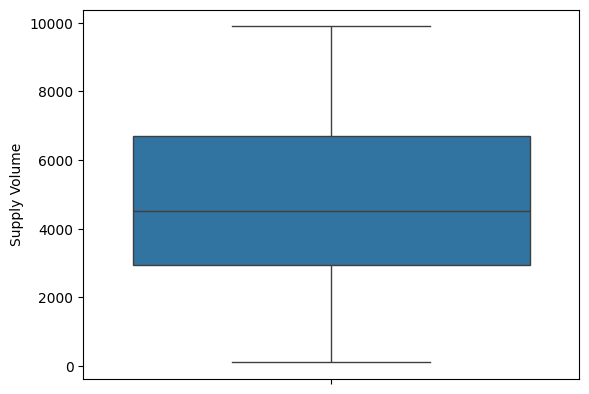

In [6]:
# outliers supply volume
import seaborn as sns

sns.boxplot(df['Supply Volume'])

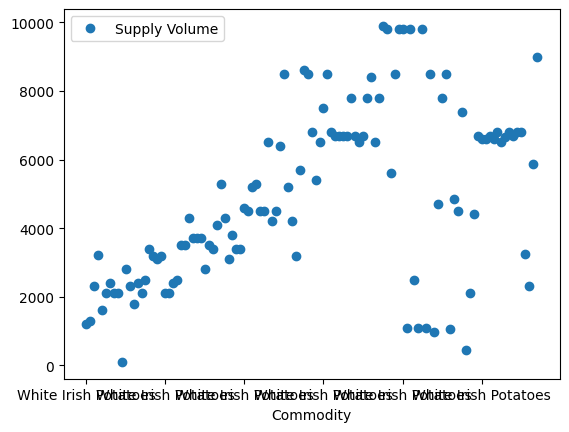

In [7]:
import matplotlib.pyplot as plt

df.plot(x = 'Commodity', y = 'Supply Volume', style = 'o')
plt.show()

## Feature Engineering
#### split the date column

In [7]:
# splitting the date column
df['Date'] = pd.to_datetime(df['Date']) #convert to datetime
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df = df.drop('Date', axis=1)

In [8]:
df.head()

,Market,Commodity,Retail,Supply Volume,County,Day,Month,Year
0,Molo,White Irish Potatoes,35.0,1200,Nakuru,30,12,2023
1,Molo,White Irish Potatoes,35.0,1300,Nakuru,29,12,2023
2,Molo,White Irish Potatoes,30.0,2300,Nakuru,28,12,2023
3,Molo,White Irish Potatoes,30.0,3208,Nakuru,23,12,2023
4,Molo,White Irish Potatoes,30.0,1600,Nakuru,22,12,2023


# ML Modelling

##### column to predict - 'retail price', this is a regressiom problem since the variable is continous. linear regression, random forest, gradient boosting
##### features to use - 'market', 'commodity', 'supply volume', "county", 'date'

In [9]:
# define features and target variable
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [10]:
# convert categorical columns into numeric
#label_encoder = LabelEncoder()
#df['Commodity'] = label_encoder.fit_transform(df['Commodity'])

# Label encode categorical features
categorical_columns = ['Market', 'Commodity', 'County']
label_encoders = {}

for col in categorical_columns:
    label_encoders[col] =LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [11]:
df.head()

,Market,Commodity,Retail,Supply Volume,County,Day,Month,Year
0,0,1,35.0,1200,0,30,12,2023
1,0,1,35.0,1300,0,29,12,2023
2,0,1,30.0,2300,0,28,12,2023
3,0,1,30.0,3208,0,23,12,2023
4,0,1,30.0,1600,0,22,12,2023


In [12]:
# define x and y
X = df.drop('Retail', axis=1)
y = df['Retail']

In [13]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
#X_train, X_test, y_train, y_test

In [14]:
# train random regressor/model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# predict on the test data
y_pred = model.predict(X_test)

In [16]:
# evaluate
#MAE - diff between predicted values and actual values. A lower MAE indicates a better performing model

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mae)
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 14.22369565217391
Root Mean Squared Error: 3.7714315123271045


In [17]:
y_pred = model.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,23.000000,23.000000
mean,48.043478,36.923496
std,45.119516,17.611812
min,10.000000,9.089600
25%,30.000000,30.950000
50%,30.000000,32.968100
75%,40.000000,37.325000
max,180.000000,95.590000


In [18]:
y_pred

array([32.6727, 30.95  , 39.85  , 43.1   , 31.25  , 39.95  , 34.95  ,
       35.    , 39.65  , 30.7   , 24.89  , 31.6   ,  9.0896, 80.41  ,
       31.05  , 32.9681, 34.6   , 34.4   , 27.12  , 33.5   , 25.    ,
       95.59  , 30.95  ])

In [19]:
# Assuming X_test is the test dataset and y_test is the actual retail prices
X_test = X_test.copy()  # To avoid modifying the original X_test
X_test['Actual_Retail'] = y_test.values
X_test['Predicted_Retail'] = y_pred

In [76]:
# Save to Excel
output_file = 'predicted_prices.xlsx'
X_test.to_excel(output_file, index=False)

print(f"Predicted prices saved to {output_file}")

Predicted prices saved to predicted_prices.xlsx


In [52]:
print("Top 20 prices:")
print(top_20_prices[['Market', 'Commodity','Supply Volume', 'Year', 'y_pred']])


Top 20 prices:
    Market  Commodity  Supply Volume  Year     y_pred
84    Molo          1           1100  2023   8.852800
86    Molo          1           1100  2023   8.852800
81    Molo          1           1080  2023   8.852800
0     Molo          1           1200  2023  12.002800
88    Molo          1            980  2023  12.854300
92    Molo          1           1050  2023  18.626700
79    Molo          1           9800  2023  18.799798
80    Molo          1           9800  2023  18.799798
82    Molo          1           9800  2023  18.799798
85    Molo          1           9800  2023  18.799798
76    Molo          1           9800  2023  18.799798
1     Molo          1           1300  2023  23.131000
15    Molo          1           2500  2023  23.472619
23    Molo          1           2500  2023  23.472619
83    Molo          1           2500  2023  23.472619
96    Molo          1            450  2023  23.745400
4     Molo          1           1600  2023  24.640286
101   Molo   

In [106]:
#feature importance
importances = model.feature_importances_
feature_names = X.columns

# Sort feature importances
sorted_indices = np.argsort(importances)[::-1]

print("Feature Importances:")
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")


Feature Importances:
Month: 0.5435
Supply Volume: 0.2225
Day: 0.1767
Commodity: 0.0572
Year: 0.0000
County: 0.0000
Market: 0.0000


In [20]:
#save model joblib
import joblib
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [21]:
#reload the saved model when needed
model = joblib.load('random_forest_model.pkl')

In [22]:
def get_user_input():
  Market = int(input('enter market: '))
  Commodity = int(input('commodity: '))
  suppy_volume = int(input('enter supply volume: '))
  County = int(input('county: '))
  Day = int(input('day: '))
  Month = int(input('month: '))
  Year = int(input('year: '))

  return [Market, Commodity, suppy_volume, County, Day, Month, Year]

In [123]:
user_input = get_user_input()

enter market: 0
commodity: 1
enter supply volume: 2000
county: 0
day: 12
month: 5
year: 2024


In [124]:
user_input_df = pd.DataFrame([user_input], columns=['Market', 'Commodity', 'Supply Volume', 'County', 'Day', 'Month', 'Year'])
user_predicted_Retail_Price = model.predict(user_input_df)


In [125]:
print(f"Predicted Retail Price: {user_predicted_Retail_Price[0]:.2f}")

Predicted Retail Price: 79.28


# 2024 Prediction

In [23]:
# Generate 2024 prediction data
# Generate realistic data for 2024 based on 2023 statistics
# Step 1: Calculate average Supply Volume for 2023
avg_supply_volume = df['Supply Volume'].mean()

# Step 2: Define the structure for 2024 data
counties = df['County'].unique()       # Get unique counties
markets = df['Market'].unique()        # Get unique markets
commodities = df['Commodity'].unique() # Get unique commodities
days = list(range(1, 32))              # Possible days in a month
months = list(range(1, 13))            # All months in the year

# Step 3: Generate the data
data_2024 = []
for county in counties:
    for market in markets:
        for commodity in commodities:
            for month in months:
                for day in days:
                    # Append realistic data for 2024
                    data_2024.append({
                        'Market': market,
                        'Commodity': commodity,
                        'Supply Volume': np.random.normal(avg_supply_volume, 200), # Add some variation
                        'County': county,
                        'Day': day,
                        'Month': month,
                        'Year': 2024
                    })

# Convert the list into a DataFrame
df_2024 = pd.DataFrame(data_2024)

# Ensure no negative supply volumes
df_2024['Supply Volume'] = df_2024['Supply Volume'].apply(lambda x: max(x, 0))

print(df_2024.head())  # Check the first few rows


   Market  Commodity  Supply Volume  County  Day  Month  Year
0       0          1    4719.472178       0    1      1  2024
1       0          1    4693.398729       0    2      1  2024
2       0          1    5365.116331       0    3      1  2024
3       0          1    5194.123373       0    4      1  2024
4       0          1    5126.507110       0    5      1  2024


In [24]:
#fine tune the model
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees
    'max_depth': [10, 20, None],            # Maximum depth of trees
    'min_samples_split': [2, 5, 10],        # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],          # Minimum samples per leaf
}

# Initialize the Random Forest model
model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator = model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [25]:
# Train the optimized Random Forest model
best_model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

# Evaluate the performance
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Optimized Model RMSE: {rmse}")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Actual_Retail
- Predicted_Retail


In [ ]:
# Make predictions for 2024
predicted_prices_2024 = best_model.predict(df_2024)

# Add predictions to the 2024 DataFrame
df_2024['Predicted Retail'] = predicted_prices_2024

# Display some results
print(df_2024[['County', 'Month', 'Day', 'Predicted Retail']].head())


   County  Month  Day  Predicted Retail
0       0      1    1         36.715130
1       0      1    2         36.848666
2       0      1    3         36.920047
3       0      1    4         36.920047
4       0      1    5         37.006178


In [ ]:
avg_prices_by_month = df_2024.groupby('Month')['Predicted Retail'].mean()
print(avg_prices_by_month)

Month
1     35.047484
2     35.040422
3     35.051227
4     35.051883
5     35.051090
6     35.049190
7     35.045344
8     24.735665
9     35.775651
10    38.916796
11    35.343591
12    34.557764
Name: Predicted Retail, dtype: float64
